1. 
a) A Classification Decision Tree is a machine learning model used to address classification problems, that aim to predict a categorical label or class for a given set of inputs. It might have some type of problem a Classification Decision Tree addresses.Decision Trees are well-suited for addressing classification problems involving discrete outcome variables, whether binary (e.g., yes/no) or multi-class (e.g., categories A, B, C). They excel at capturing non-linear relationships, making them highly adaptable to complex datasets. Additionally, their straightforward decision-making process is easy to interpret and visualize, which makes them particularly useful for tasks that require explainability.
b) The primary difference between a Classification Decision Tree and Multiple Linear Regression lies in their purpose, approach, and output. A Decision Tree is used for classification tasks, predicting discrete class labels (e.g., "Yes" or "No") by recursively partitioning the data into regions based on feature thresholds, making it adept at handling non-linear relationships. In contrast, Multiple Linear Regression is used for regression problems, predicting continuous numerical values by modeling a linear relationship between input features and the target. While Decision Trees create interpretable "if-then" rules for classifying data, regression outputs a smooth, continuous prediction based on weighted feature sums.

2. 
Different evaluation metrics suit different real-world scenarios. Accuracy is ideal for balanced datasets with equal costs for errors, such as classifying emails as spam or not when both classes are equally represented and errors have similar consequences. Sensitivity is critical when identifying all positives is essential, such as in disease screening, where missing a positive case could have severe outcomes. Specificity is prioritized when avoiding false positives is crucial, like in confirmatory diagnostic tests where a false positive can lead to unnecessary stress and costly interventions. Precision is key when the cost of false positives is high, such as in fraud detection, where ensuring flagged cases are truly fraudulent reduces unnecessary investigations. Choosing the right metric depends on the specific context and cost of errors.

3. 
After the pre-processed, it has been successfully preprocessed and is now ready for analysis. It contains 319 rows and 10 columns, with various data types: one categorical column (Hard_or_Paper), two integer columns (Pub year, NumPages), three float columns (List Price, Amazon Price, Thick), and four object columns (Title, Author, Publisher, ISBN-10). Below is a snapshot of the first five rows:




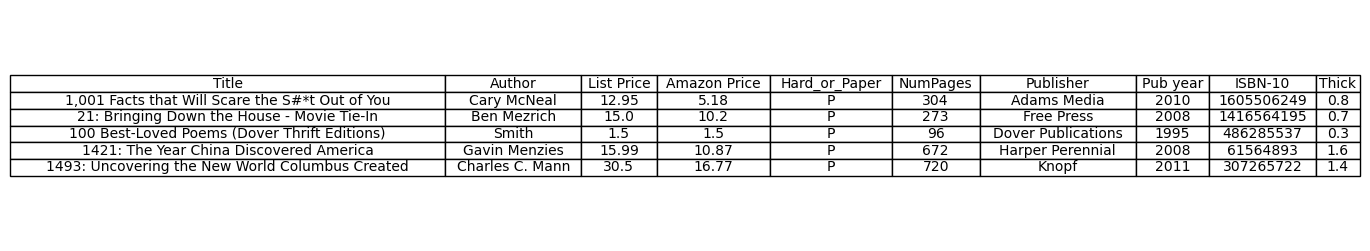

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the dataset
data = {
    "Title": [
        "1,001 Facts that Will Scare the S#*t Out of You",
        "21: Bringing Down the House - Movie Tie-In",
        "100 Best-Loved Poems (Dover Thrift Editions)",
        "1421: The Year China Discovered America",
        "1493: Uncovering the New World Columbus Created",
    ],
    "Author": [
        "Cary McNeal", "Ben Mezrich", "Smith", "Gavin Menzies", "Charles C. Mann"
    ],
    "List Price": [12.95, 15.00, 1.50, 15.99, 30.50],
    "Amazon Price": [5.18, 10.20, 1.50, 10.87, 16.77],
    "Hard_or_Paper": ["P", "P", "P", "P", "P"],
    "NumPages": [304, 273, 96, 672, 720],
    "Publisher": [
        "Adams Media", "Free Press", "Dover Publications", "Harper Perennial", "Knopf"
    ],
    "Pub year": [2010, 2008, 1995, 2008, 2011],
    "ISBN-10": [1605506249, 1416564195, 486285537, 61564893, 307265722],
    "Thick": [0.8, 0.7, 0.3, 1.6, 1.4],
}

df = pd.DataFrame(data)

# Display the table as a plot
fig, ax = plt.subplots(figsize=(12, 3))  # Adjust size for better readability
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc="center",
    loc="center",
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.show()


The exploratory data analysis (EDA) reveals several key insights about the dataset of 319 books. The average list price is $18.36 (std: $13.98), and the average Amazon price is $12.94 (std: $12.44), with prices ranging from $1.50 to $139.95. Books have an average of 334 pages, spanning from 24 to 896 pages. Publication years range from 1936 to 2011, with most books published after 1995, peaking in the early 2000s. Paperbacks are the dominant format, making up 73% of the entries. Price distributions are positively skewed, with most books priced under $20, and Amazon prices are typically lower due to discounts. Hardcover books tend to have slightly more pages than paperbacks. Correlation analysis shows a strong positive relationship between list price and Amazon price (𝑟=0.95) and a moderate correlation between the number of pages and thickness (𝑟=0.63), indicating thicker books generally contain more pages.

/tmp/ipykernel_70/3221300197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
/tmp/ipykernel_70/3221300197.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
/tmp/ipykernel_70/3221300197.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

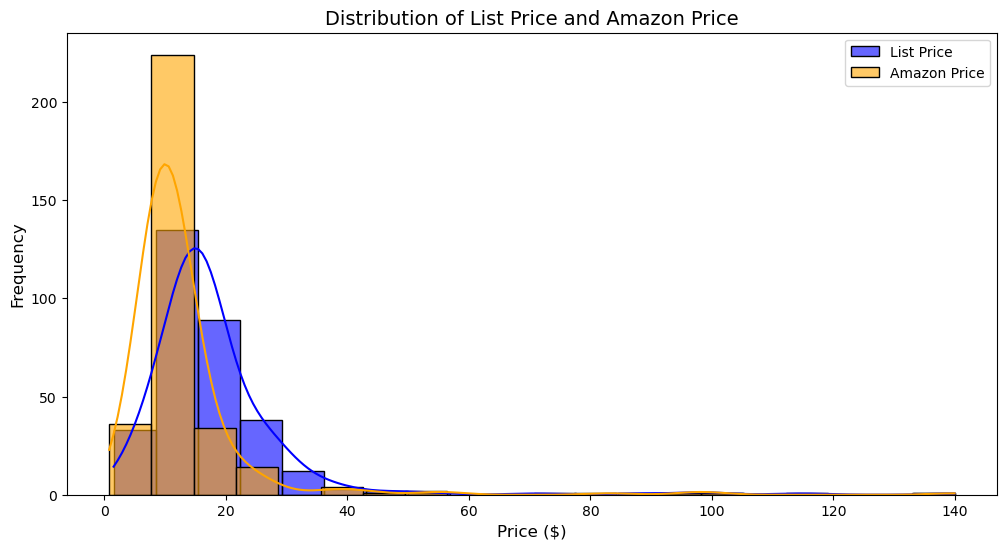

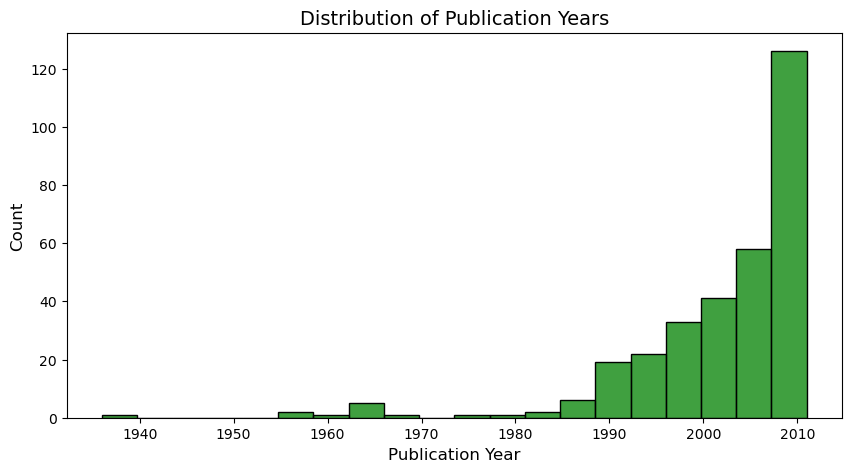

/tmp/ipykernel_70/3221300197.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ab_reduced_noNaN, x="Hard_or_Paper", y="NumPages", palette="coolwarm")


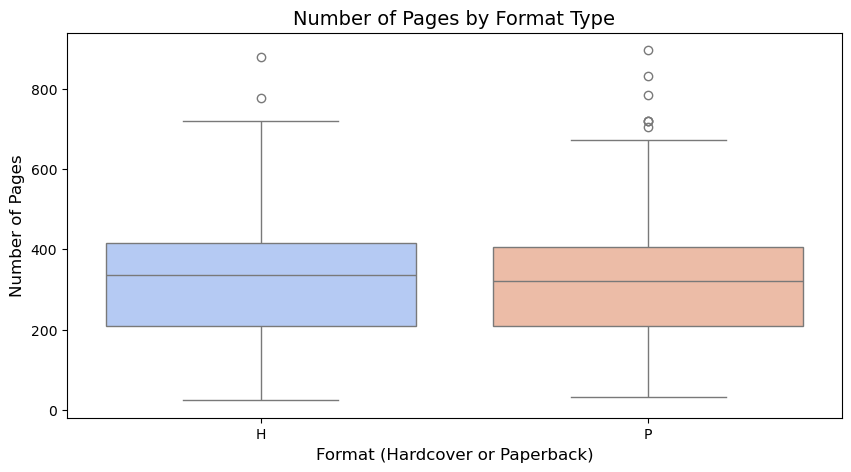

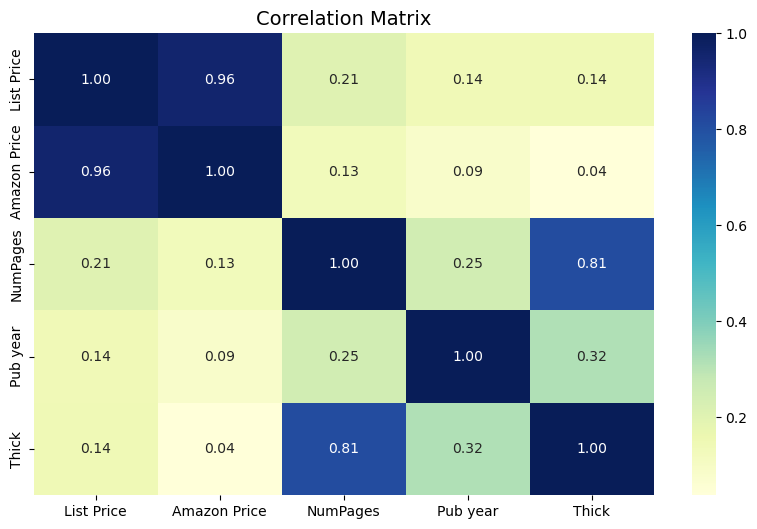

In [11]:
# Ensure necessary imports are included
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (use your dataset file path if needed)
file_path = './amazonbooks.csv'
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Preprocess the dataset
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")
ab_reduced_noNaN = ab_reduced.dropna()
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# 1. Distribution of List Price and Amazon Price
plt.figure(figsize=(12, 6))
sns.histplot(ab_reduced_noNaN["List Price"], bins=20, kde=True, color='blue', label="List Price", alpha=0.6)
sns.histplot(ab_reduced_noNaN["Amazon Price"], bins=20, kde=True, color='orange', label="Amazon Price", alpha=0.6)
plt.title("Distribution of List Price and Amazon Price", fontsize=14)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

# 2. Distribution of Publication Years
plt.figure(figsize=(10, 5))
sns.histplot(ab_reduced_noNaN["Pub year"], bins=20, kde=False, color='green')
plt.title("Distribution of Publication Years", fontsize=14)
plt.xlabel("Publication Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 3. Distribution of Number of Pages by Format Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=ab_reduced_noNaN, x="Hard_or_Paper", y="NumPages", palette="coolwarm")
plt.title("Number of Pages by Format Type", fontsize=14)
plt.xlabel("Format (Hardcover or Paperback)", fontsize=12)
plt.ylabel("Number of Pages", fontsize=12)
plt.show()

# 4. Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(ab_reduced_noNaN.corr(numeric_only=True), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()


4. 

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in the training and testing sets
print(f'Training set size: {len(ab_reduced_noNaN_train)}')
print(f'Test set size: {len(ab_reduced_noNaN_test)}')


Training set size: 255
Test set size: 64


y: This line is creating the target variable y by using pd.get_dummies() to convert the categorical Hard_or_Paper column into dummy variables (binary values). It selects the 'H' column to represent whether a book is a hardcover (H) or not.
x: This line is defining the feature set X, which is the List Price column. It indicates that the model will use the List Price variable to predict whether the book is a hardcover or paperback.

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Not Hard'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Not Hard'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Not Hard'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Not Hard'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hard'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hard'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Not Hard')]

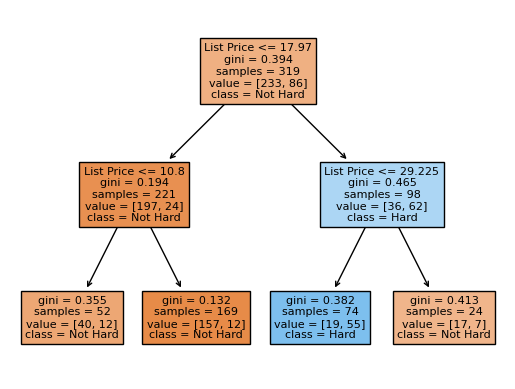

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Initialize the classifier with max_depth=2 to limit the tree's depth
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier using the List Price feature (X) to predict 'Hard_or_Paper' (y)
clf.fit(X, y)

# Plot the trained decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Not Hard', 'Hard'], filled=True)


The code above display the decision tree based on the List Price feature, showing how the classifier splits the data to predict the format of the book.

5. 
The DecisionTreeClassifier model (`clf2`) is trained using three features—`NumPages`, `Thick`, and `List Price`—to predict whether a book is a hardcover or paperback. The tree splits the dataset at each node based on the values of these features, choosing the best feature at each step to reduce uncertainty. With a `max_depth` of 4, the tree has up to 4 decision nodes. Predictions are made by following the splits starting from the root node, evaluating each feature until the model reaches a leaf node. The predicted class (either `'Hard'` or `'Not Hard'`) is determined by the majority of the data in that leaf. Each split represents a decision rule, and the tree visualizes these rules, showing how the model uses the feature values to make predictions based on the book’s characteristics.

[Text(0.45652173913043476, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Not Hard'),
 Text(0.1956521739130435, 0.7, 'NumPages <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Not Hard'),
 Text(0.08695652173913043, 0.5, 'Thick <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Hard'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not Hard'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Hard'),
 Text(0.30434782608695654, 0.5, 'Thick <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]\nclass = Not Hard'),
 Text(0.21739130434782608, 0.3, 'List Price <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]\nclass = Not Hard'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]\nclass = Not Hard'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Not Hard'),
 Text(0.391304347826087, 0.3, 'N

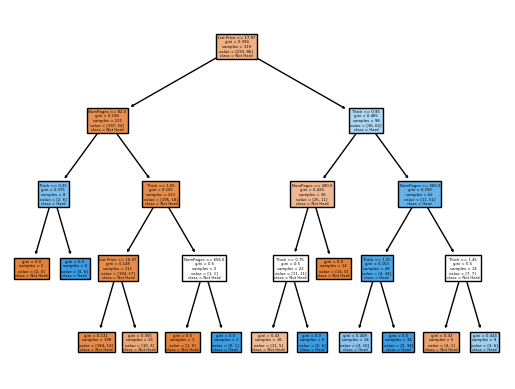

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Feature set with three columns

# Initialize the classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier using the features NumPages, Thick, and List Price to predict 'Hard_or_Paper'
clf2.fit(X, y)

# Plot the trained decision tree
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Not Hard', 'Hard'], filled=True)


6. 

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# Extract features and target from the test set
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for clf2
X_test_list_price = ab_reduced_noNaN_test[['List Price']]  # Features for clf (only List Price)
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # True target

# Make predictions with both classifiers
y_pred_clf = clf.predict(X_test_list_price)  # clf using only List Price
y_pred_clf2 = clf2.predict(X_test)  # clf2 using NumPages, Thick, List Price

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Display the confusion matrices
print("Confusion Matrix for clf (List Price only):")
print(cm_clf)

print("\nConfusion Matrix for clf2 (NumPages, Thick, List Price):")
print(cm_clf2)

# Calculate metrics for clf
tp_clf = cm_clf[1, 1]  # True positives
tn_clf = cm_clf[0, 0]  # True negatives
fp_clf = cm_clf[0, 1]  # False positives
fn_clf = cm_clf[1, 0]  # False negatives

accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity is also recall (True Positive Rate)
specificity_clf = tn_clf / (tn_clf + fp_clf)  # Specificity (True Negative Rate)

# Calculate metrics for clf2
tp_clf2 = cm_clf2[1, 1]  # True positives
tn_clf2 = cm_clf2[0, 0]  # True negatives
fp_clf2 = cm_clf2[0, 1]  # False positives
fn_clf2 = cm_clf2[1, 0]  # False negatives

accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)

# Report the results
print("\nMetrics for clf (List Price only):")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


Confusion Matrix for clf (List Price only):
[[40  4]
 [ 3 17]]

Confusion Matrix for clf2 (NumPages, Thick, List Price):
[[42  2]
 [ 2 18]]

Metrics for clf (List Price only):
Accuracy: 0.8906
Sensitivity: 0.8500
Specificity: 0.9091

Metrics for clf2 (NumPages, Thick, List Price):
Accuracy: 0.9375
Sensitivity: 0.9000
Specificity: 0.9545


Accuracy measures the proportion of true results (both true positives and true negatives) in the population.
 Accuracy=(TP+TN)/(TP+TN+FP+FN) 

Sensitivity measures the proportion of actual positives that are correctly identified.
 Sensitivity=(TP)/(TP+FN) 

Specificity measures the proportion of actual negatives that are correctly identified.
 Specificity=(TN)/(TN+FP) 

Precision measures the proportion of positive identifications that were actually correct.
Precision=(TP)/(TP+FP)

7. 
The difference between the two confusion matrices lies in the number and type of features used to train the model. In the first confusion matrix, the classifier is trained using only the List Price feature, while in the second matrix, additional features (NumPages and Thick) are included. This addition of features provides more information for the model, potentially improving its predictive power and leading to more accurate predictions. As a result, the second model is likely to exhibit higher accuracy, reduced false positives, and false negatives, resulting in a better classification performance. The improvement in the second confusion matrix reflects the model's ability to leverage more relevant variables to make more precise predictions.

8. 
The clf2.feature_importances_ attribute provides a numerical score for each feature, reflecting its significance in the model. The clf2.feature_names_in_ attribute lists the features used in the model. By plotting these importance scores, you can visually determine which feature has the greatest impact on the model's predictions. The feature with the highest importance score is considered the most influential in determining the predictions made by clf2.

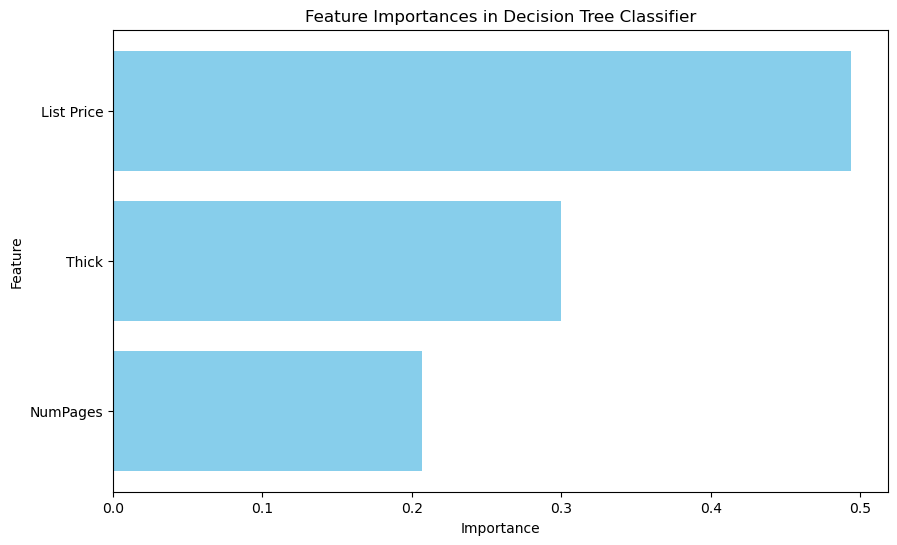

'List Price'

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model clf2
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title("Feature Importances in Decision Tree Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Reporting the most important feature
most_important_feature = feature_names[np.argmax(importances)]
most_important_feature


9. 
In linear regression, the coefficients represent the magnitude and direction of the relationship between each predictor variable and the target variable, with higher absolute values indicating stronger influence on the prediction. These coefficients are straightforward to interpret, as they directly show the effect of each variable on the outcome. In contrast, feature importances in decision trees reflect how often and how significantly each feature contributes to reducing the model's impurity (e.g., Gini index) at decision nodes, but they do not directly quantify the effect size of each feature; instead, they offer a relative measure of importance across all features.

Here's a summary of our chat:

1. **Exploratory Data Analysis (EDA)**: We began by discussing how to preprocess and explore the Amazon books dataset, performing tasks like removing certain columns, handling missing data, and converting column types. We then visualized various aspects of the data, including distributions of book prices, publication years, and number of pages by format type.

2. **Modeling and Evaluation**: We covered how to split the dataset into training and testing sets (80/20 split) using `train_test_split`, and discussed how to train a Decision Tree model (`clf`) using the `List Price` feature to predict whether a book is hardcover or paperback. We also explored confusion matrices to evaluate model performance.

3. **Feature Importances in Decision Trees**: We discussed how feature importances are derived from decision trees, explained how to visualize these importances using `clf2`, and identified the most important predictor for making decisions based on the `feature_importances_` attribute.

4. **Comparing Linear Models and Decision Trees**: Lastly, we explored the difference between interpreting coefficients in linear regression models and feature importances in decision trees, noting that linear regression provides direct coefficients while decision trees provide relative importance scores based on impurity reduction.

Feel free to let me know if you’d like any specific part to be expanded!

https://chatgpt.com/c/673fb3b8-b414-8011-87ee-1be677733c6f